# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.82007930544                   -1.43    5.35s
  2   +19.85632213341        0.95       -0.88   10.4ms
  3   +14.27020774172        0.75       -0.42   10.2ms
  4   +10.84936225572        0.53       -0.20   10.2ms
  5   +10.46686174451       -0.42       -0.59   8.30ms
  6   +9.798206410629       -0.17       -0.77   8.26ms
  7   +9.139016350015       -0.18       -0.88   8.48ms
  8   +8.690536779010       -0.35       -0.90   8.25ms
  9   +8.409398467865       -0.55       -0.97   8.24ms
 10   +8.238716779294       -0.77       -1.04   8.24ms
 11   +8.148987262085       -1.05       -1.01   8.26ms
 12   +8.018397552112       -0.88       -1.01   8.28ms
 13   +7.937938002290       -1.09       -1.02   8.26ms
 14   +7.891144729718       -1.33       -1.16   6.34ms
 15   +7.875807768654       -1.81       -1.18   6.37ms
 16   +7.846786977703       -1.54       -1.29   6.24ms
 17   +7.82

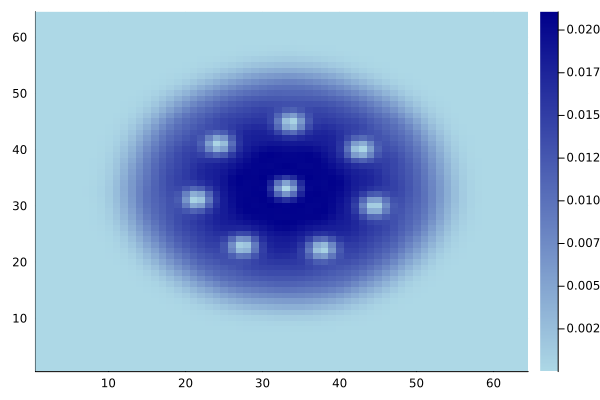

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)